In [3]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import os

# Ruta a la carpeta de imágenes
ruta_carpeta = '/content/drive/MyDrive/Semestre 9/Visión por Computador/Semana_6/landmark_ims/Ims'
cantidad_pares = 4  # Número de pares de imágenes
# Inicialización del detector ORB
detector_orb = cv.ORB_create(nfeatures=4000)

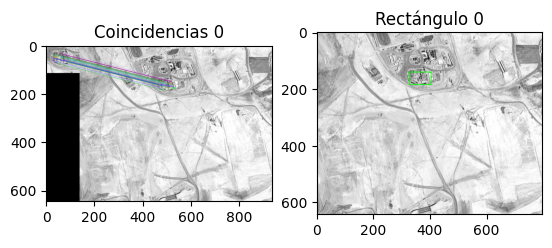

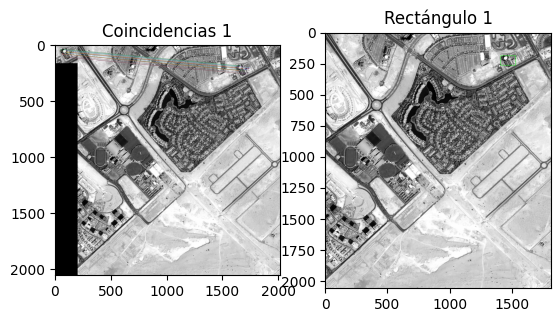

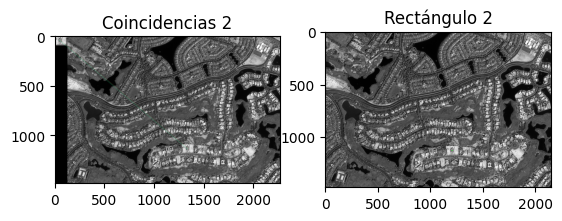

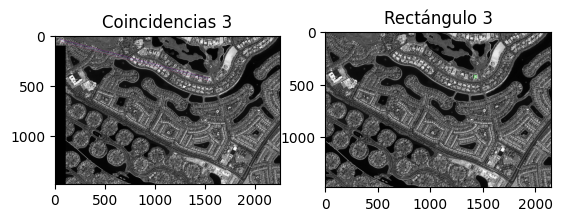

In [4]:
for indice in range(cantidad_pares):
    # Cargar imágenes en escala de grises
    imagen1 = cv.imread(os.path.join(ruta_carpeta, f'land{indice}.jpg'), cv.IMREAD_GRAYSCALE)  # Imagen de consulta
    imagen2 = cv.imread(os.path.join(ruta_carpeta, f'src{indice}.jpg'), cv.IMREAD_GRAYSCALE)   # Imagen de referencia

    # Validación de carga de imágenes
    if imagen1 is None or imagen2 is None:
        print(f'Error al cargar las imágenes land{indice}.jpg o src{indice}.jpg')
        continue

    # Detección de puntos clave y cálculo de descriptores con ORB
    puntos1, descriptores1 = detector_orb.detectAndCompute(imagen1, None)
    puntos2, descriptores2 = detector_orb.detectAndCompute(imagen2, None)

    # Crear el comparador de descriptores BFMatcher
    comparador = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True)

    # Realizar coincidencias entre descriptores
    coincidencias = comparador.match(descriptores1, descriptores2)

    # Filtrar coincidencias en función de un umbral de distancia
    umbral_distancia = 30  # Valor del umbral de distancia
    coincidencias_buenas = [m for m in coincidencias if m.distance < umbral_distancia]

    # Ordenar las coincidencias según la distancia y tomar las mejores 50
    coincidencias_buenas = sorted(coincidencias_buenas, key=lambda x: x.distance)[:50]

    # Dibujar las primeras 30 coincidencias
    imagen_coincidencias = cv.drawMatches(imagen1, puntos1, imagen2, puntos2, coincidencias_buenas[:30], None, flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

    # Extraer coordenadas de los puntos clave coincidentes
    coordenadas = np.array([puntos2[m.trainIdx].pt for m in coincidencias_buenas]).astype(int)

    if coordenadas.shape[0] > 0:
        x, y, ancho, alto = cv.boundingRect(coordenadas)
        if ancho > 0 and alto > 0:
            imagen2_color = cv.cvtColor(imagen2, cv.COLOR_GRAY2BGR)
            cv.rectangle(imagen2_color, (x, y), (x + ancho, y + alto), (0, 255, 0), 2)

            plt.subplot(1, 2, 1), plt.imshow(imagen_coincidencias), plt.title(f'Coincidencias {indice}')
            plt.subplot(1, 2, 2), plt.imshow(imagen2_color), plt.title(f'Rectángulo {indice}')
            plt.show()
        else:
            print(f'Rectángulo no válido en src{indice}.jpg')
    else:
        print(f'Insuficientes coincidencias válidas en src{indice}.jpg')